<div>
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller"><img src="data_layout/PCP_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

# Exponential Function

In this notebook, we review some properties of the complex exponential function. This function plays an important role for defining and understanding the [Fourier transform](PCP_DFT.html). This notebook closely follows the [FMP Notebook on the Exponential Function](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_ExponentialFunction.html).

<ul>
    <li><a href='#power'>Power Series</a></li>
    <li><a href='#euler'>Exponentiation Identity and Euler's Formula</a></li>
    <li><a href='#differential'>Differential Equations</a></li>
    <li><a href='#roots'>Roots of Unity</a></li>
    <li><a href='#exercise_approx_exp'>Exercise 1: Approximation of Exponential Function via Power Serie</a></li>    
    <li><a href='#exercise_gaussian'>Exercise 2: Gaussian Function</a></li>
    <li><a href='#exercise_spiral'>Exercise 3: Spiral Generation</a></li>    
</ul> 

<a id='power'></a> 
## Power Series

One encounters the **real exponential function** $\exp:\mathbb{R}\to \mathbb{R}$ in the context of many mathematical applications, and the function can be characterized in may different ways. Historically, the exponential function was studied already by **Johann Bernoulli** in the $17^\mathrm{th}$ century when considering **interest rates**: Assume that an amount of $1$ earns an interest $x$ at an annual rate compounded monthly. Then the interest earned each month is $\frac{x}{12}$ times the current value, so that each month the total value is multiplied by $\left(1+\frac{x}{12}\right)$ and the value at the end of the year is $\left(1+\frac{x}{12}\right)^{12}$. In the case the interested is compounded every day, it becomes $\left(1+\frac{x}{365}\right)^{365}$. Letting the time intervals grow per year by making them shorter leads to the limit definition of the exponential function

$$\exp(x) = \mathrm{lim}_{n\to\infty} \left(1+\frac{x}{n}\right)^{n},$$

which was first given by **Leonhard Euler**. The constant $e:=\exp(1)\approx 2.71828 \ldots$ is also known as **Euler's number**. By expanding the $n$-fold product in the above definition, one can show that the exponential function can also be expressed by the following power series:

$$\exp(x) := \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{1 \cdot 2} + \frac{x^3}{1 \cdot 2 \cdot 3} + \dots$$

with $x\in\mathbb{R}$. Replacing in the power series the real-valued variable $x\in\mathbb{R}$ by a complex-valued variable $z\in\mathbb{C}$, one still obtains the **complex exponential function** $\exp:\mathbb{C}\to \mathbb{C}$ given by 

$$\exp(z) := \sum_{n=0}^{\infty} \frac{z^n}{n!} = 1 + z + \frac{z^2}{1 \cdot 2} + \frac{z^3}{1 \cdot 2 \cdot 3} + \dots$$

In the following plot, we visualize the real part, the imaginary part, as well as the absolute value of the complex exponential function over the complex plane. It can be seen that the absolute value $|\exp(z)|$ only depends on the real part $x$ of the complex argument $z=x+iy$, while increasing exponentially with increasing $x$. Furthermore, the real part $\mathrm{Re}(\exp(z))$ and imaginary part $\mathrm{Im}(\exp(z))$ show periodic oscillations over $y$ for a fixed $x$. This behavior becomes clear from Euler's formula and other trigonometric identities that hold for the exponential function. 

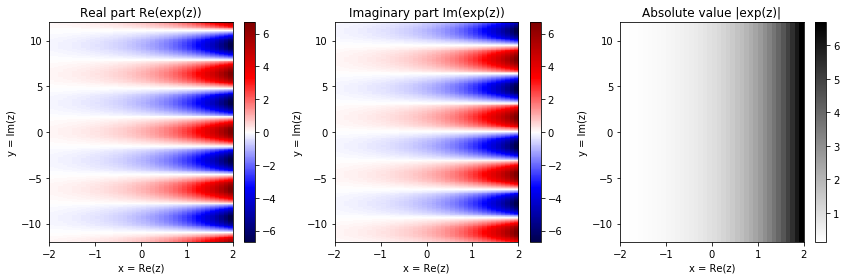

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

X, Y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-12, 12, 0.1))
Z = X + Y*1j
f_exp = np.exp(Z)

plt.figure(figsize=(12, 4))
extent = [-2, 2, -12, 12]
plt.subplot(1, 3, 1)
plt.imshow(np.real(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Real part Re(exp(z))')
plt.xlabel('x = Re(z)')
plt.ylabel('y = Im(z)')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.imag(f_exp),  aspect='auto', cmap='seismic', origin='lower', extent=extent)
plt.title('Imaginary part Im(exp(z))')
plt.xlabel('x = Re(z)')
plt.ylabel('y = Im(z)')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(f_exp),  aspect='auto', cmap='gray_r', origin='lower', extent=extent)
plt.title('Absolute value |exp(z)|')
plt.xlabel('x = Re(z)')
plt.ylabel('y = Im(z)')
plt.colorbar()
plt.tight_layout()

<a id='euler'></a> 
## Exponentiation Identity and Euler's Formula 

Based on the power series definition, one may proof two famous formulas of the exponential function that explain many of its properties. The first formula is knowns as **exponentiation identity** and say that 

$$
  \exp(z_1 + z_2) = \exp(z_1)\cdot \exp(z_2)
$$

for any complex numbers $z_1, z_2\in\mathbb{C}$. In particular, this property explain the exponential increase for real arguments. For example, 

$$
  \exp(n) = \exp(1+1+\ldots +1) = \exp(1)^n = e^n
$$

for $n\in\mathbb{N}$. The second famous formula, which is known as **Euler's formula**, relates the values of the exponential function at purely imaginary arguments to trigonometric functions. It states that for the complex number $c = i\gamma$ with some real-valued $\gamma\in\mathbb{R}$ one has the identity 

$$\mathrm{exp}(i\gamma) = \cos(\gamma) + i\sin(\gamma) .$$

Actually, starting with the real sine and cosine functions, one often defines $\mathrm{exp}(i\gamma)$ by means of the Euler formula (rather than using the power series). This explain the periodic behavior of the real an imaginary part of $\exp$ along the imaginary (vertical) axis as shown in the previous figure. The real value $\gamma$ can be thought of an angle (given in radians).  The following visualization shows how the values $\mathrm{exp}(i\gamma)$ change when increasing the angle $\gamma$ from $0$ to $2\pi$:

In [ ]:
from matplotlib import ticker 
%matplotlib inline

cmap = plt.cm.get_cmap('hsv') # hsv is nice because it defines a circular color map

N = 64

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(N):
    gamma = 2 * np.pi * i / N
    c = np.exp(1j * gamma)
    color = cmap(i / N)
    ax1.plot([0, np.angle(c)], [0, np.abs(c)], color=color)
    ax1.plot(np.angle(c), np.abs(c), 'o', color=color)
    ax2.plot(gamma, np.real(c), 'o', color=color)
    ax3.plot(gamma, np.imag(c), 'o', color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radiants]')
ax2.set_ylabel('$\mathrm{Re}(\exp(i \gamma))$')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radiants]')
ax3.set_ylabel('$\mathrm{Im}(\exp(i \gamma))$')
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

We have seen from Euler's formula that the complex values $\mathrm{exp}(i\gamma)$ lie on the unit circle of the complex plane for all $\gamma\in\mathbb{R}$. Furthermore, due to periodicity, it suffices to consider $\gamma\in[0,2\pi)$. In fact, $\gamma$ encodes the angle (in radians) of the complex number $c = \mathrm{exp}(i\gamma)$, while $|c|=1$. From the exponentiation identity and Euler's formula, one can derive the following properties of the exponential function:

\begin{eqnarray}
\exp(i\gamma) & = & \exp(i(\gamma+2\pi)) \\
|\exp(i\gamma)|  & = & 1 \\
\overline{\exp(i\gamma)} & = & \exp(-i\gamma) \\
\exp(i(\gamma_1+\gamma_2)) & = & \exp(i\gamma_1) \exp(i\gamma_2) \\
\end{eqnarray}

Plugging in Euler's formula in the last identity, on obtains the trigonometric identities for the sine and cosine:

\begin{eqnarray}
   \cos(\gamma_1+\gamma_2) &=&  \cos(\gamma_1)\cos(\gamma_2) - \sin(\gamma_1)\sin(\gamma_2)\\
   \sin(\gamma_1+\gamma_2) &=&  \cos(\gamma_1)\sin(\gamma_2) + \cos(\gamma_2)\sin(\gamma_1)
\end{eqnarray}

<a id='differential'></a> 
## Differential Equations

The exponential function can be characterized by another important property in terms of differential equations. Let us consider the differential equation $\frac{df}{dx}(x)=f(x)$ with initial condition $f(0)=1$. The [**Picard&ndash;Lindelöf Theorem**](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem) implies that there exists a unique solution. Using the power series definition, one can easily check that the exponential function indeed fulfills these properties. The differential equation also holds for the complex exponential function. In particular, one obtains the following equations:

\begin{eqnarray}
\frac{d\exp(x)}{dx} & = & \exp(x)\\
\frac{d\exp(z)}{dz} & = & \exp(z)\\
\frac{d\exp(i\gamma)}{d\gamma} & = & i\exp(i\gamma)
\end{eqnarray}

There are many numerical methods for approximating solutions of differential equations with initial condition. The easiest method is known as **Euler's method**, where one starts with the initial value and then uses a tangent line over a short step size to estimate the function's value a the next step. In the next code cell, we implement this procedure for the case of the real exponential function. The figure shows the approximative solution compared to the NumPy function `np.exp`. To better understand the quality of the solution of the interval considered, we apply `plt.semilogy` for plotting.

In [ ]:
def exp_approx_Euler(x_min=0, x_max=2, x_delta=0.01, f_0=1):
    """Approximation of exponential function using Euler's method

    Notebook: PCP_exp.ipynb

    Args:
        x_min: Start of input interval
        x_max: Ende of input interval
        x_delta: Step size
        f_0: Initial condition

    Returns:
        f: Signal
        x: Sampled input interval
    """
    x = np.arange(0, x_max+x_delta, x_delta)
    N = len(x)
    f = np.zeros(N)
    f[0] = f_0
    for n in range(1, N):
        f[n] = f[n-1] + f[n-1]*x_delta
    return f, x


plt.figure(figsize=(12, 4))
x_max = 3
x_delta = 0.1
f, x = exp_approx_Euler(x_min=0, x_max=x_max, x_delta=x_delta, f_0=1)

plt.subplot(1, 3, 1)
plt.plot(x, f, 'r')
plt.plot(x, np.exp(x), 'k')
plt.legend(['Approximation','exp'])
plt.xlim([0, x_max])
plt.grid()
plt.title('Approximation with $\Delta$ = %.1f' % x_delta)

plt.subplot(1, 3, 2)
plt.semilogy(x, f, 'r')
plt.semilogy(x, np.exp(x), 'k')
plt.legend(['Approximation','exp'])
plt.xlim([0, x_max])
plt.grid(which='both')
plt.title('Approximation with $\Delta$ = %.1f' % x_delta)


x_delta  = 0.01
f, x = exp_approx_Euler(x_min=0, x_max=x_max, x_delta=x_delta, f_0=1)
plt.subplot(1, 3, 3)
plt.semilogy(x, f, 'r')
plt.semilogy(x, np.exp(x), 'k')
plt.legend(['Approximation','exp'])
plt.xlim([0, x_max])
plt.grid(which='both')
plt.title('Approximation with $\Delta$ = %.2f' % x_delta)
plt.tight_layout()

<a id='roots'></a> 
## Roots of Unity

Let $N \in \mathbb{N}_{>0}$ be a positive integer. A complex number $\rho \in \mathbb{C}$ is called an $N^\mathrm{th}$ **root of unity** if $\rho^N = 1$. It is not hard to see that there are exactly $N$ distinct $N^\mathrm{th}$ roots of unity. Additionally, if $\rho^n \neq 1$ for all $n\in [1:N-1]$, the root $\rho$ is called a **primitive** $N^\mathrm{th}$ root of unity. With the properties mentioned above, it is easy to see that $\rho_N:=\exp(2 \pi i / N)$ is such a **primitive** $N^\mathrm{th}$ root of unity. Furthermore, all $N^\mathrm{th}$ roots of unity can be generated by considering powers of $\rho_N$:

$$1=\rho_N^0, \quad \rho_N^1, \quad \rho_N^2, \quad ...,\quad \rho_N^{N-1}$$

The following plot shows all roots of unity for different integers $N \in \mathbb{N}_{>0}$. The primitive roots are indicated in red. 

In [ ]:
from math import gcd

def plot_vector(c, color='k', start=0, linestyle='-'):  
    """Plotting complex number as vectore
    Notebook: PCP_exp.ipynb"""    
    return plt.arrow(np.real(start), np.imag(start), np.real(c), np.imag(c), 
                     linestyle=linestyle, head_width=0.05, 
                     fc=color, ec=color, overhang=0.3, length_includes_head=True)


def plot_root_unity(N, ax):
    """Plotting N-th root of unity into figure with axis
    Notebook: PCP_exp.ipynb"""
    root_unity = np.exp(2j * np.pi / N)
    root_unity_power = 1

    ax.grid()
    ax.set_xlim([-1.4, 1.4])
    ax.set_ylim([-1.4, 1.4])
    ax.set_xlabel('$\mathrm{Re}$')
    ax.set_ylabel('$\mathrm{Im}$')
    ax.set_title('Roots of unity for $N=%d$' % N)

    for n in range(0, N):
        colorPlot = 'r' if gcd(n, N) == 1 else 'k'
        plot_vector(root_unity_power, color=colorPlot)
        ax.text(np.real(1.2*root_unity_power), np.imag(1.2*root_unity_power),
                r'$\rho_{%s}^{%s}$' % (N, n), size='14',
                color=colorPlot, ha='center', va='center')
        root_unity_power *= root_unity

    circle_unit = plt.Circle((0, 0), 1, color='lightgray', fill=0)
    ax.add_artist(circle_unit)

plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
plot_root_unity(N=8, ax=ax)    
ax = plt.subplot(1, 3, 2)
plot_root_unity(N=11, ax=ax)
ax = plt.subplot(1, 3, 3)
plot_root_unity(N=12, ax=ax)
plt.tight_layout()

In [ ]:
a = 1.5
b = 0.8
c = a + b*1j
print('c  = ', c, ', type(c)  = ', type(c))
c2 = complex(a, b)
print('c2 = ', c2, ', type(c2) = ', type(c2))

## Exercises and Results

In [ ]:
import LibPCP.exp
show_result = True

<a id='exercise_approx_exp'></a>
<div class="alert alert-block alert-info">
<strong>Exercise 1: Approximation of Exponential Function via Power Series</strong><br>
Implementation a function <code>exp_power_series</code>with input arguments $z\in\mathbb{C}$ and $N\in\mathbb{N}$, which outputs an approximation $\sum_{n=0}^{N} \frac{z^n}{n!}$ of $\exp(z)$. Similarly, implement a function <code>exp_limit_compound</code> that approximates $\exp(z)$ via $\left(1+\frac{z}{N}\right)^{N}$. Test the two functions for various input arguments and compare the results with the NumPy function <code>np.exp</code>. In particular, compare the approximation quality of <code>exp_power_series</code> and <code>exp_limit_compound</code> for increasing $N$ (fixing a complex number $z$).
</div>

In [ ]:
#<solution>
# Your Solution
#</solution>

In [ ]:
LibPCP.exp.exercise_approx_exp(show_result=show_result)

<a id='exercise_gaussian'></a>
<div class="alert alert-block alert-info">
<strong>Exercise 2: Gaussian Function</strong><br>
The Gaussian function $g:\mathbb{R}\to \mathbb{R}$ with expected value $\mu$ and variance $\sigma^2$ is defined by

$$
   g(x):= \frac{1}{\sigma\sqrt{2\pi}}  \exp\left(-\frac{1}{2} \left(\frac{x-\mu}{\sigma} \right)^2 \right).
$$

Using <code>np.exp</code>, implement a function <code>compute_gaussian_1D</code> that inputs a NumPy array <code>X</code> (as well as input arguments for $\mu$ and $\sigma$) and evaluates the Gaussian function <code>X</code> in a point-wise fashion. Plot the result for an input vector and various choices of $\mu$ and $\sigma$.
</div>

In [ ]:
#<solution>
# Your Solution
#</solution>

In [ ]:
LibPCP.exp.exercise_gaussian(show_result=show_result)

<a id='exercise_spiral'></a>
<div class="alert alert-block alert-info">
<strong>Exercise 3: Spiral  Generation</strong><br>
Implement a function <code>generate_spiral</code> that generates a spiral of increasing radius (Hint: Make use of the exponential function). The function should have the following arguments:
<ul>
    <li><code>rad_start</code>: Radius to start with</li>
    <li><code>rad_end</code>: Radius to stop with</li>
    <li><code>num_rot</code>: Number of rotations</li>
    <li><code>angle_start</code>: Angle to start with (given in degrees)</li>
    <li><code>N</code>: Number of data points to represent the spiral</li>
</ul>
Plot the spiral for various parameters.
</div>

In [ ]:
#<solution>
# Your Solution
#</solution>

In [ ]:
LibPCP.exp.exercise_spiral(show_result=show_result)

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data_layout/PCP_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>